# Part 2.A

In [43]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from random import randint, random
import numpy as np
df = pd.read_csv("..\Life Expectancy Data.csv")

# Dropped as they are redundant columns
df = df.drop(columns=['infant deaths', ' thinness 5-9 years'])

# As the data is very clean, we will create some inconsistencies.
df["Schooling"] = [-x if randint(0,10) == 3 else x for x in df["Schooling"].values]
df["GDP"] = [-x if randint(0,10) == 3 else x for x in df["GDP"].values]
df["under-five deaths "] = [x+random() for x in df["under-five deaths "].values]

inconsistent_datatype = ["Schooling", "under-five deaths"]

fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns],
         "Real Type": ["int64" if x in inconsistent_datatype else str(df[x].dtype) for x in df.columns]}
fields_df = pd.DataFrame(data=fields)

display(df.head())
display(fields_df)



,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83.731715,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86.558736,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89.938058,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93.969314,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,-9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97.361304,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


,Fields,Types,Real Type
0,Country,object,object
1,Year,int64,int64
2,Status,object,object
3,Life expectancy,float64,float64
4,Adult Mortality,float64,float64
5,Alcohol,float64,float64
6,percentage expenditure,float64,float64
7,Hepatitis B,float64,float64
8,Measles,int64,int64
9,BMI,float64,float64


In [44]:
# Adding an extra column for continents
europe = ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Belarus', 'Germany', 'Denmark', 'Estonia', 'Finland', 
          'Greece', 'Hungary', 'Iceland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Norway', 'Poland', 
          'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'San Marino', 'Bolivia (Plurinational State of)',
          'Ukraine', 'Bosnia and Herzegovina', 'Croatia', 'Monaco', 'Montenegro', 'Serbia', 'Spain', 'Switzerland',
         'Czechia', 'Democratic People\'s Republic of Korea']

africa = ['Angola', 'Burkina Faso', 'Burundi', 'Benin', 'Botswana', 'Congo', 'Cameroon', 
          'Djibouti', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia',
          'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Mauritius', 'Malawi', 'Mozambique', 'Namibia', 'Niger', 
          'Rwanda', 'Seychelles', 'Sudan', 'Senegal', 'Somalia', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 
          'Algeria', 'Central African Republic', 'Chad', 'Comoros', 'Equatorial Guinea', 'Morocco', 'South Africa', 
          'Swaziland', 'Cabo Verde']

asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bahrain', 'Brunei Darussalam', 'Cyprus', 'Georgia', 'Indonesia', 'Israel', 
        'Iraq', 'Jordan', 'Japan', 'Kyrgyzstan', 'Kuwait', 'Lebanon', 'Myanmar', 'Mongolia', 'Maldives', 'Malaysia', 'Oman', 
        'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Thailand', 'China'
        'Tajikistan', 'Turkmenistan', 'Turkey', 'Uzbekistan', 'Yemen', 'Cambodia', 'Kazakhstan', 'United Arab Emirates']

north_america = ['Antigua and Barbuda', 'Barbados', 'Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 
                 'Dominican Republic', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 
                 'Trinidad and Tobago', 'El Salvador', 'Grenada', 'Saint Kitts and Nevis', 'Saint Lucia', 
                 'Saint Vincent and the Grenadines', 'United States of America']

south_america = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Paraguay', 
                 'Suriname', 'Uruguay']

oceania = ['Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Vanuatu', 'Samoa']
continent = []
for country in df['Country'].values:
    if (country in europe):
        continent.append('Europe')
    elif (country in africa):
        continent.append('Africa')
    elif (country in asia):
        continent.append('Asia')
    elif (country in north_america):
        continent.append('North America')
    elif (country in south_america):
        continent.append('South America')
    elif (country in oceania):
        continent.append('Oceania')
    else:
        continent.append('Unknown')
        
df['Continent'] = continent

# Part 2.B (List and Fix Missing and Inconsistent Data)

In [45]:
# List of created inconsistent data.
inconsistent_data = inconsitent_datatype = ["Schooling", "under-five deaths ", "GDP"]
fields2 = {"Fields":[str(x) for x in df.columns], 
          "Inconsistencies":[True if x in inconsistent_data else False for x in df.columns],
         "Missing Data": [True if df[col].isnull().any() else False for col in df.columns]}

# Create dataframe to display inconsistent and missing data.
fields2_df = pd.DataFrame(data=fields2)

# List of columns with NaN values.
null_columns=df.columns[df.isna().any()]

# Imputing all columns with NaN values.
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]  
    df[c].fillna(value,inplace=True)

# Fix the inconsistent datatypes of float64 to int64.
df['under-five deaths '] = df['under-five deaths '].apply(lambda x: int(x))

# Fix the inconsistent datatypes with negative values.
df['GDP'] = df['GDP'].apply(lambda x: abs(x))
df['Schooling'] = df['Schooling'].apply(lambda x: abs(x))



display(fields2_df)
df.info()

,Fields,Inconsistencies,Missing Data
0,Country,False,False
1,Year,False,False
2,Status,False,False
3,Life expectancy,False,True
4,Adult Mortality,False,True
5,Alcohol,False,True
6,percentage expenditure,False,False
7,Hepatitis B,False,True
8,Measles,False,False
9,BMI,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

# Part 2.B (List and Fix Outliers)

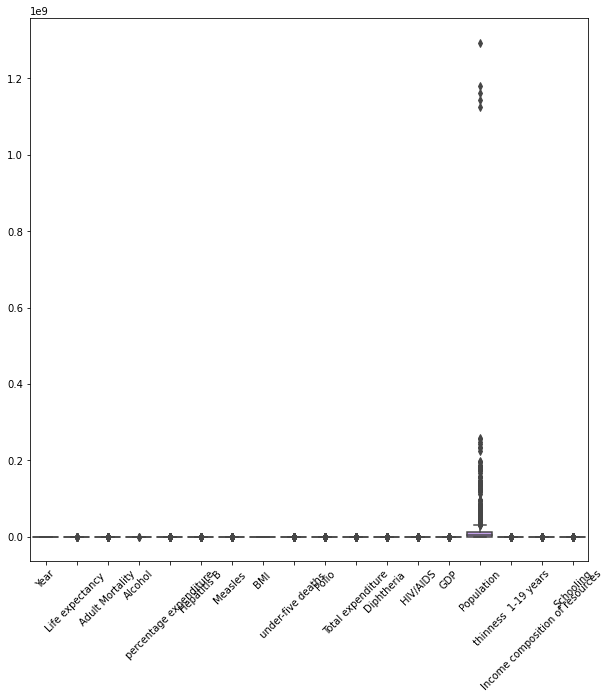

(2938, 17)
(1730, 17)


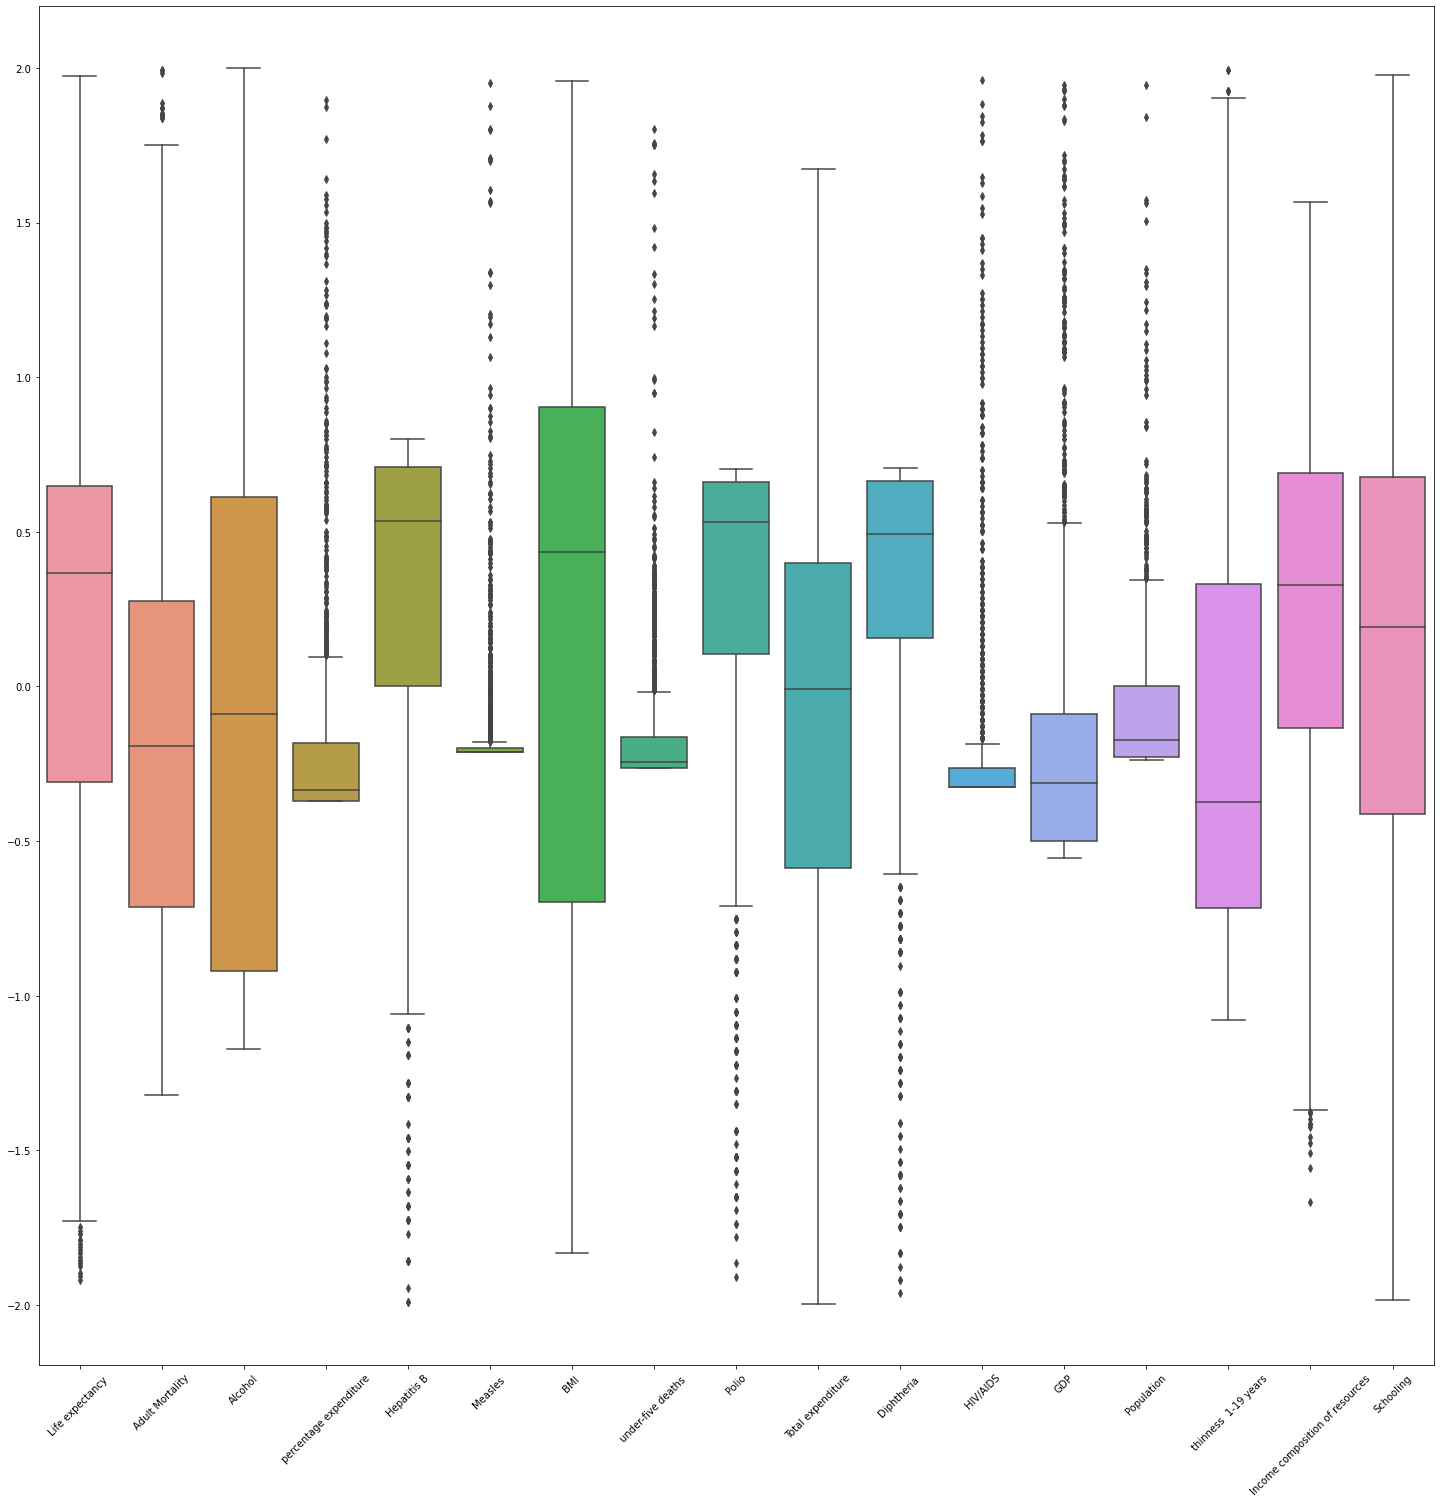

In [46]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()    

numeric_columns = df.select_dtypes(exclude='object').columns.drop('Year')
# From this graph we decided to make the threshold = 2 to limit most outliers.

# Scaled all numeric data.
scaled_values = StandardScaler().fit_transform(df[numeric_columns])

df2=pd.DataFrame(scaled_values,columns=df[numeric_columns].columns)

# print shape to check initial rows.
print(df2.shape)
threshold = 2
selected_rows= (df2<threshold).all(axis=1) & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True)
ndf=df.drop(index=selected_index)
ndf.reset_index(inplace = True, drop = True)
# Print shape to check final amount of rows.
print(df2.shape)

plt.figure(figsize=(25,25))
sns.boxplot(data=df2)
plt.xticks(rotation=45)
plt.show()

# Replacing the values from df and df2
df[numeric_columns] = df2
df = df.dropna()


# Part 3.A.i

In [47]:
# Statistical summary of numeric columns.
display(df.describe().T)

# Statistical summary of categorical columns.
display(df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Year,1730.0,2008.078613,4.611281,2000.000000,2004.000000,2008.000000,2.012000e+03,2015.000000
Life expectancy,1730.0,0.164860,0.766811,-1.917199,-0.307693,0.365565,6.495954e-01,1.975071
Adult Mortality,1730.0,-0.147249,0.751298,-1.320309,-0.713744,-0.191815,2.757035e-01,1.992626
Alcohol,1730.0,-0.042910,0.927309,-1.172958,-0.920125,-0.088839,6.141144e-01,1.998952
percentage expenditure,1730.0,-0.199277,0.324880,-0.371433,-0.369531,-0.333687,-1.817471e-01,1.895778
Hepatitis B,1730.0,0.316651,0.520423,-1.990012,0.000000,0.534009,7.111337e-01,0.799696
Measles,1730.0,-0.145065,0.227455,-0.211036,-0.211036,-0.210600,-1.976911e-01,1.951049
BMI,1730.0,0.138758,0.948058,-1.833002,-0.697453,0.435587,9.023538e-01,1.956344
under-five deaths,1730.0,-0.154635,0.229172,-0.262038,-0.262038,-0.243337,-1.638575e-01,1.801318
Polio,1730.0,0.299978,0.512704,-1.908081,0.104925,0.533224,6.617141e-01,0.704544


,count,unique,top,freq
Country,1730,174,Slovenia,16
Status,1730,2,Developing,1468
Continent,1730,7,Africa,405


# Part 3.A.ii (Categorical Columns)

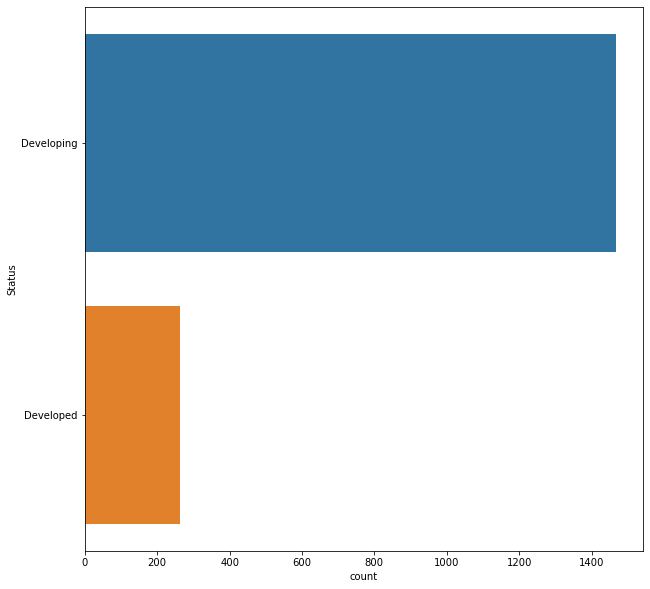

<AxesSubplot:>

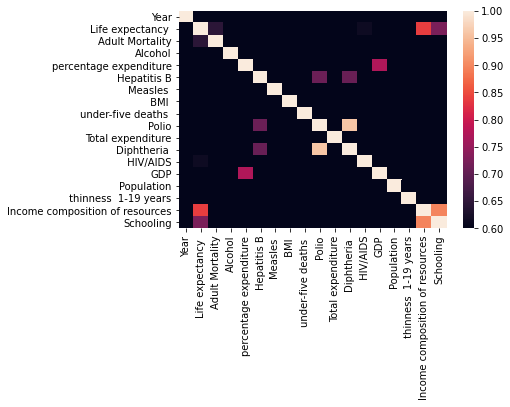

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(y='Status',data=df)
plt.show()
# Changing all negative values to positive inorder to set a limit in heatmap.
corr = df.corr().apply(lambda x: abs(x))
# Placing a minimum limit to check for high correlated values.
sns.heatmap(corr, vmin=0.6)

# Part 3.A.ii (Numeric Columns)

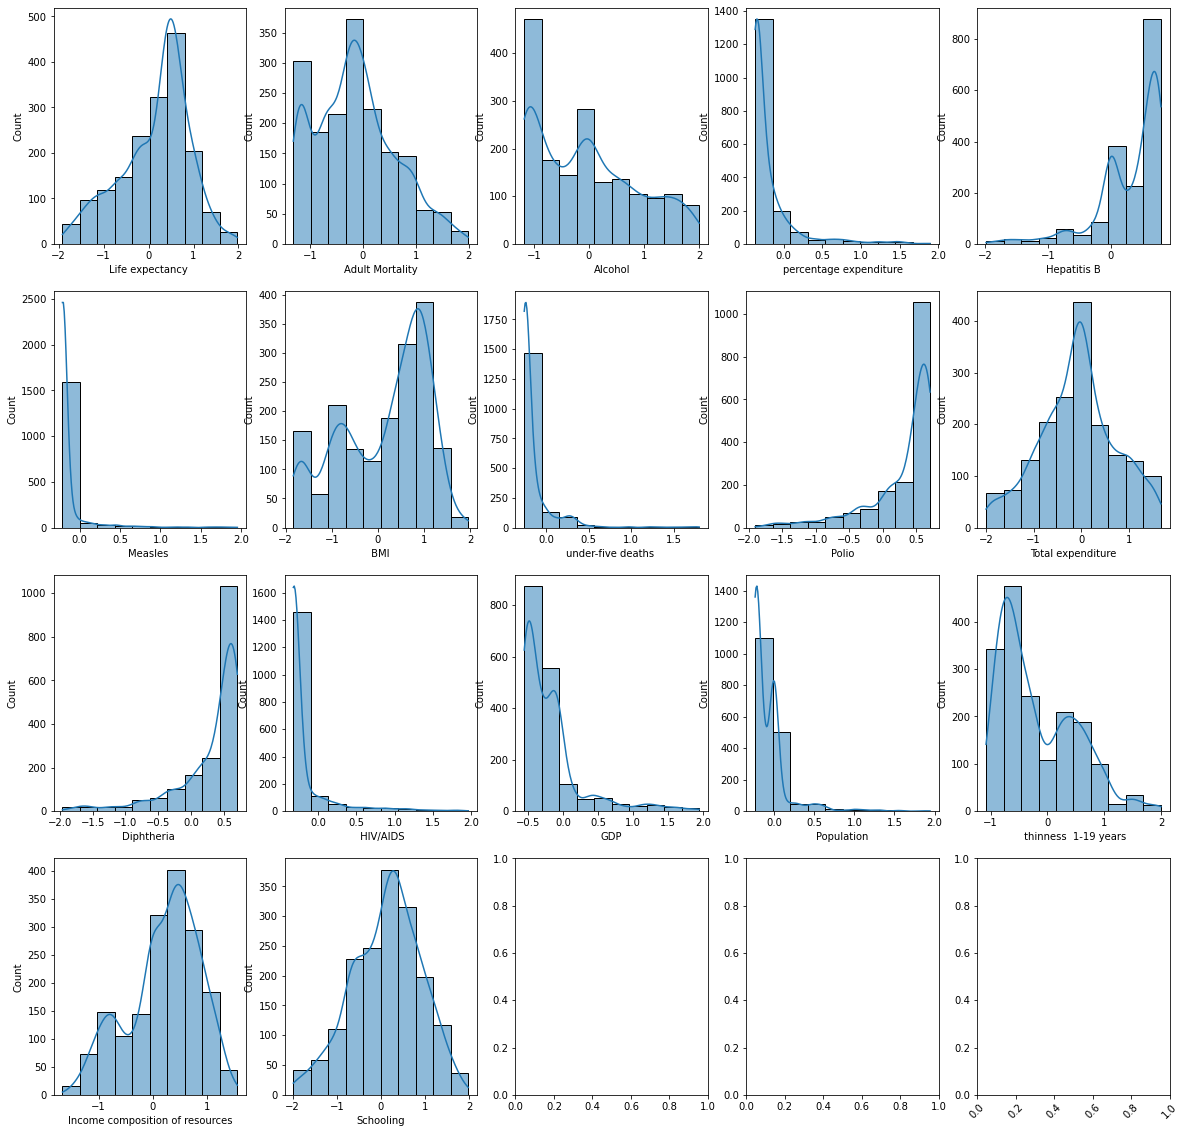

In [49]:

_, axes = plt.subplots(4,5, figsize=(20,20))
for ind, col in enumerate(numeric_columns):
    sns.histplot(x=col,bins=10,kde=True,data=df, ax=axes.flatten()[ind])
    plt.xticks(rotation=45)

plt.show()

# Part 3.A.iii

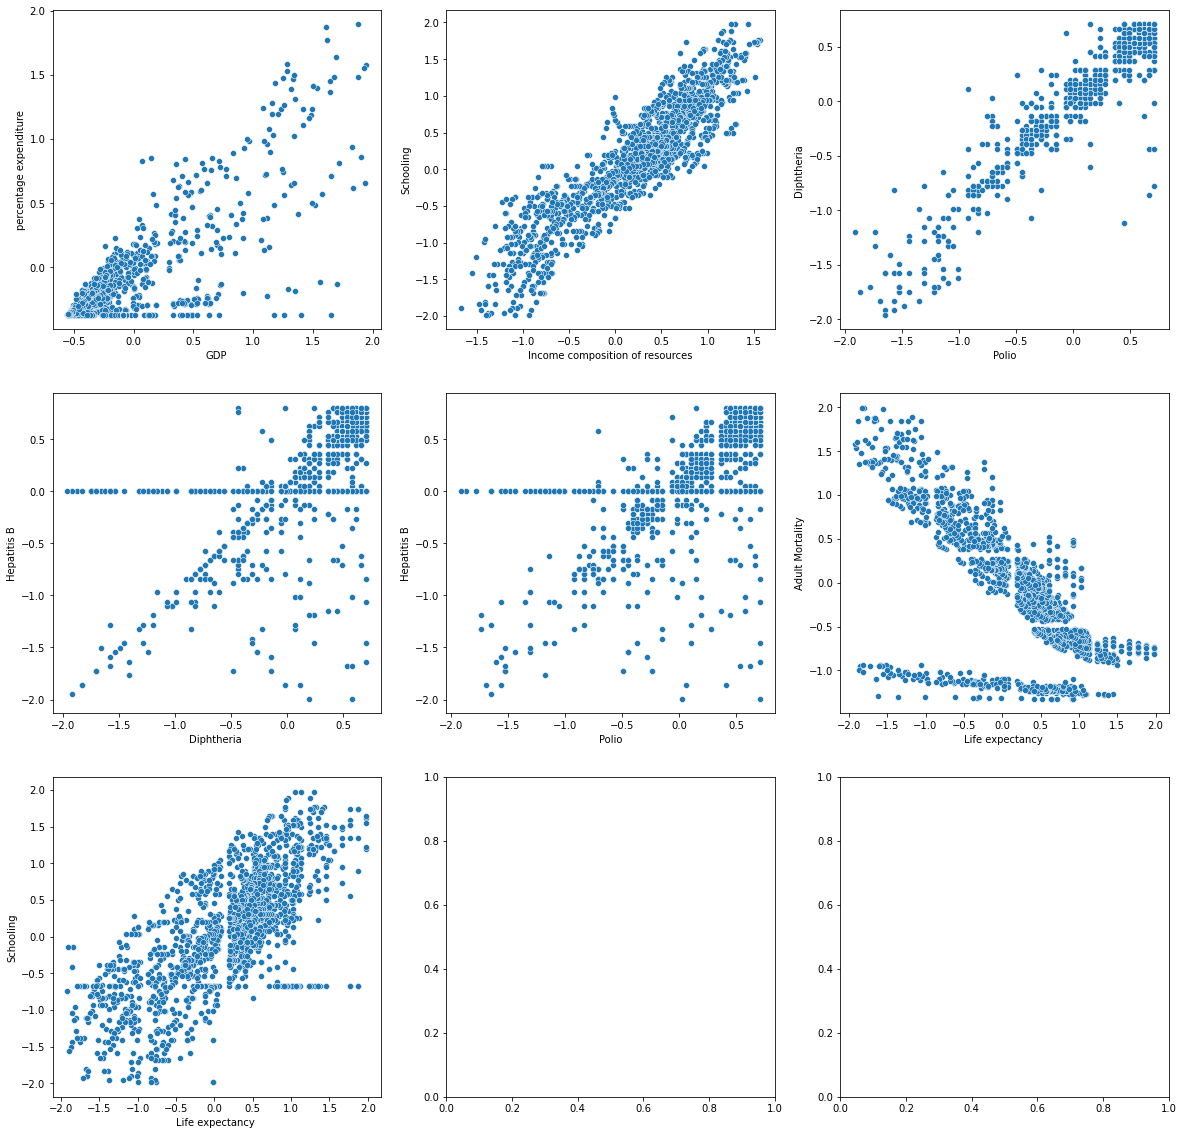

In [50]:
# We will plot bivariate graphs with a correlation of abs(x) >= 0.4, where x is
bivariate_plots = {0:['GDP', 'percentage expenditure'], 1:['Income composition of resources', 'Schooling'],
        2: ['Polio','Diphtheria '], 3:['Income composition of resources', 'Life expectancy '],
        3: ['Diphtheria ', 'Hepatitis B'], 4: ['Polio', 'Hepatitis B'], 5: ['Life expectancy ', 'Adult Mortality'],
        6: ['Life expectancy ', 'Schooling']}

_, axes = plt.subplots(3,3, figsize=(20,20))
for plot in bivariate_plots.items():
    sns.scatterplot(x= plot[1][0], y=plot[1][1], data=df, ax=axes.flatten()[plot[0]]) 

plt.show()

In [51]:
# Adding an extra column for continents
europe = ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Belarus', 'Germany', 'Denmark', 'Estonia', 'Finland', 
          'Greece', 'Hungary', 'Iceland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Norway', 'Poland', 
          'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'San Marino', 'Bolivia (Plurinational State of)',
          'Ukraine', 'Bosnia and Herzegovina', 'Croatia', 'Monaco', 'Montenegro', 'Serbia', 'Spain', 'Switzerland',
         'Czechia', 'Democratic People\'s Republic of Korea','Netherlands', 'Republic of Moldova', 'The former Yugoslav republic of Macedonia',
         'United Kingdom of Great Britain and Northern Ireland']

 

africa = ['Angola', 'Burkina Faso', 'Burundi', 'Benin', 'Botswana', 'Congo', 'Cameroon', 
          'Djibouti', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia',
          'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Mauritius', 'Malawi', 'Mozambique', 'Namibia', 'Niger', 
          'Rwanda', 'Seychelles', 'Sudan', 'Senegal', 'Somalia', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 
          'Algeria', 'Central African Republic', 'Chad', 'Comoros', 'Equatorial Guinea', 'Morocco', 'South Africa', 
          'Swaziland', 'Cabo Verde', "Côte d'Ivoire", 'Gambia', 'Sao Tome and Principe', 'South Sudan', 'United Republic of Tanzania', 'Democratic Republic of the Congo']

 

asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bahrain', 'Brunei Darussalam', 'Cyprus', 'Georgia', 'Indonesia', 'Israel', 
        'Iraq', 'Jordan', 'Japan', 'Kyrgyzstan', 'Kuwait', 'Lebanon', 'Myanmar', 'Mongolia', 'Maldives', 'Malaysia', 'Oman', 
        'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Thailand', 'China',
        'Tajikistan', 'Turkmenistan', 'Turkey', 'Uzbekistan', 'Yemen', 'Cambodia', 'Kazakhstan', 'United Arab Emirates', 'Iran (Islamic Republic of)', "Lao People's Democratic Republic", 'Republic of Korea',
       'Russian Federation', 'Syrian Arab Republic', 'Timor-Leste', 'Viet Nam']

 

north_america = ['Antigua and Barbuda', 'Barbados', 'Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 
                 'Dominican Republic', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 
                 'Trinidad and Tobago', 'El Salvador', 'Grenada', 'Saint Kitts and Nevis', 'Saint Lucia', 
                 'Saint Vincent and the Grenadines', 'United States of America']

 

south_america = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Paraguay', 
                 'Suriname', 'Uruguay' , 'Venezuela (Bolivarian Republic of)']

 

oceania = ['Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Vanuatu', 'Samoa', 'Cook Islands', 'Micronesia (Federated States of)', 'Niue']
continent = []

 

countries = asia + europe + africa + north_america + south_america + oceania

 

for country in df['Country'].unique():
    if country not in countries:
        print(country)
df['Country'].nunique()

 

for country in df['Country'].values:
    if (country in europe):
        continent.append('Europe')
    elif (country in africa):
        continent.append('Africa')
    elif (country in asia):
        continent.append('Asia')
    elif (country in north_america):
        continent.append('North America')
    elif (country in south_america):
        continent.append('South America')
    elif (country in oceania):
        continent.append('Oceania')
    else:
        continent.append('Unknown')

df['Continent'] = continent

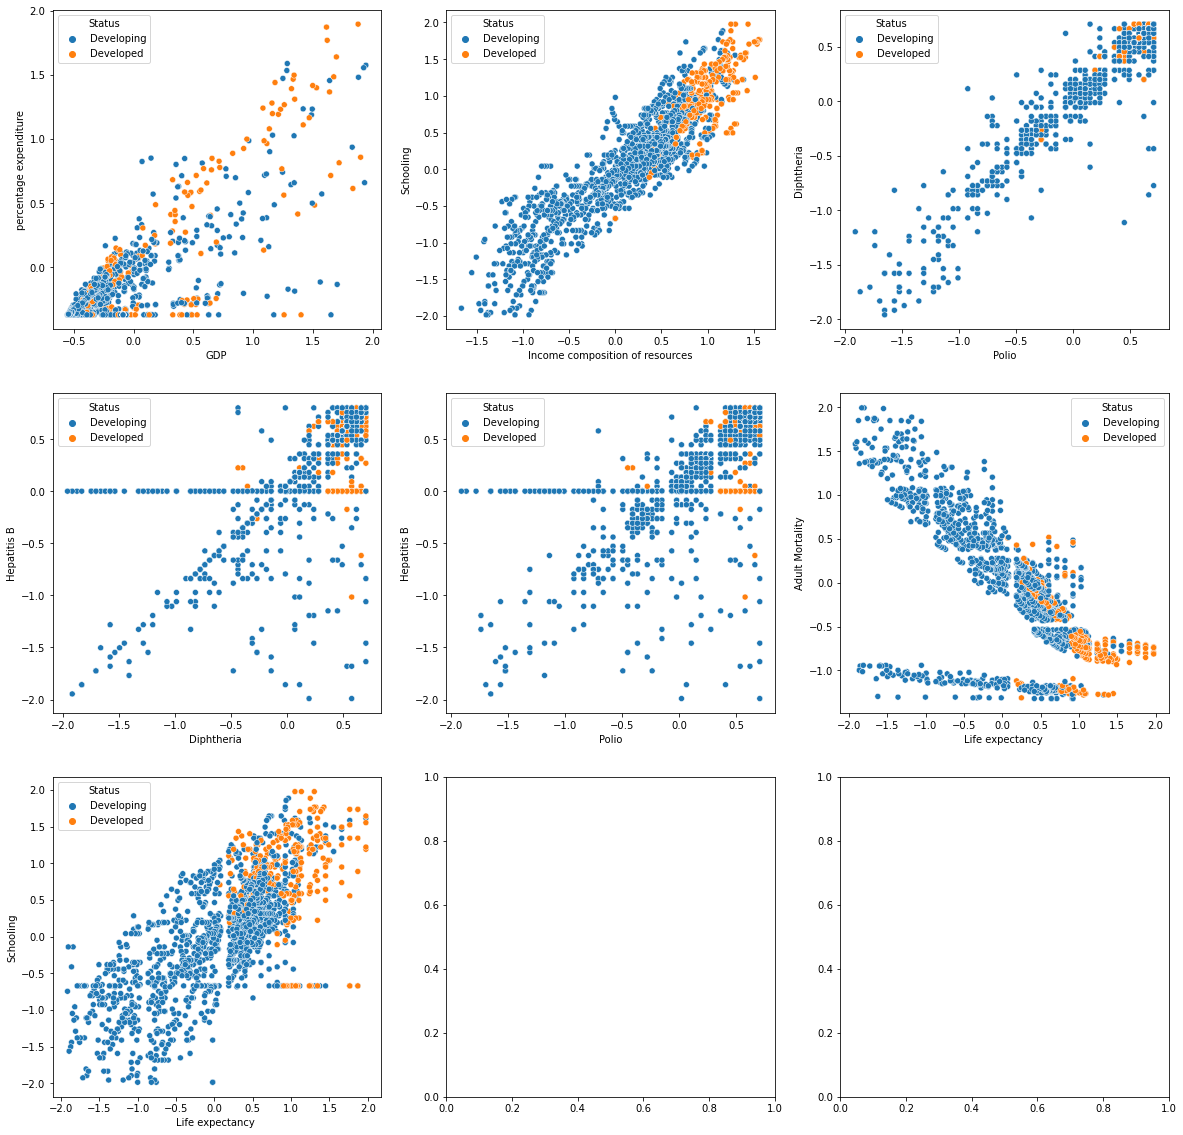

In [52]:
# We will plot bivariate graphs with a correlation of abs(x) >= 0.4, where x is
bivariate_plots = {0:['GDP', 'percentage expenditure'], 1:['Income composition of resources', 'Schooling'],
        2: ['Polio','Diphtheria '], 3:['Income composition of resources', 'Life expectancy '],
        3: ['Diphtheria ', 'Hepatitis B'], 4: ['Polio', 'Hepatitis B'], 5: ['Life expectancy ', 'Adult Mortality'],
        6: ['Life expectancy ', 'Schooling']}

_, axes = plt.subplots(3,3, figsize=(20,20))
for plot in bivariate_plots.items():
    sns.scatterplot(x= plot[1][0], y=plot[1][1], hue = 'Status', data=df, ax=axes.flatten()[plot[0]]) 

plt.show()

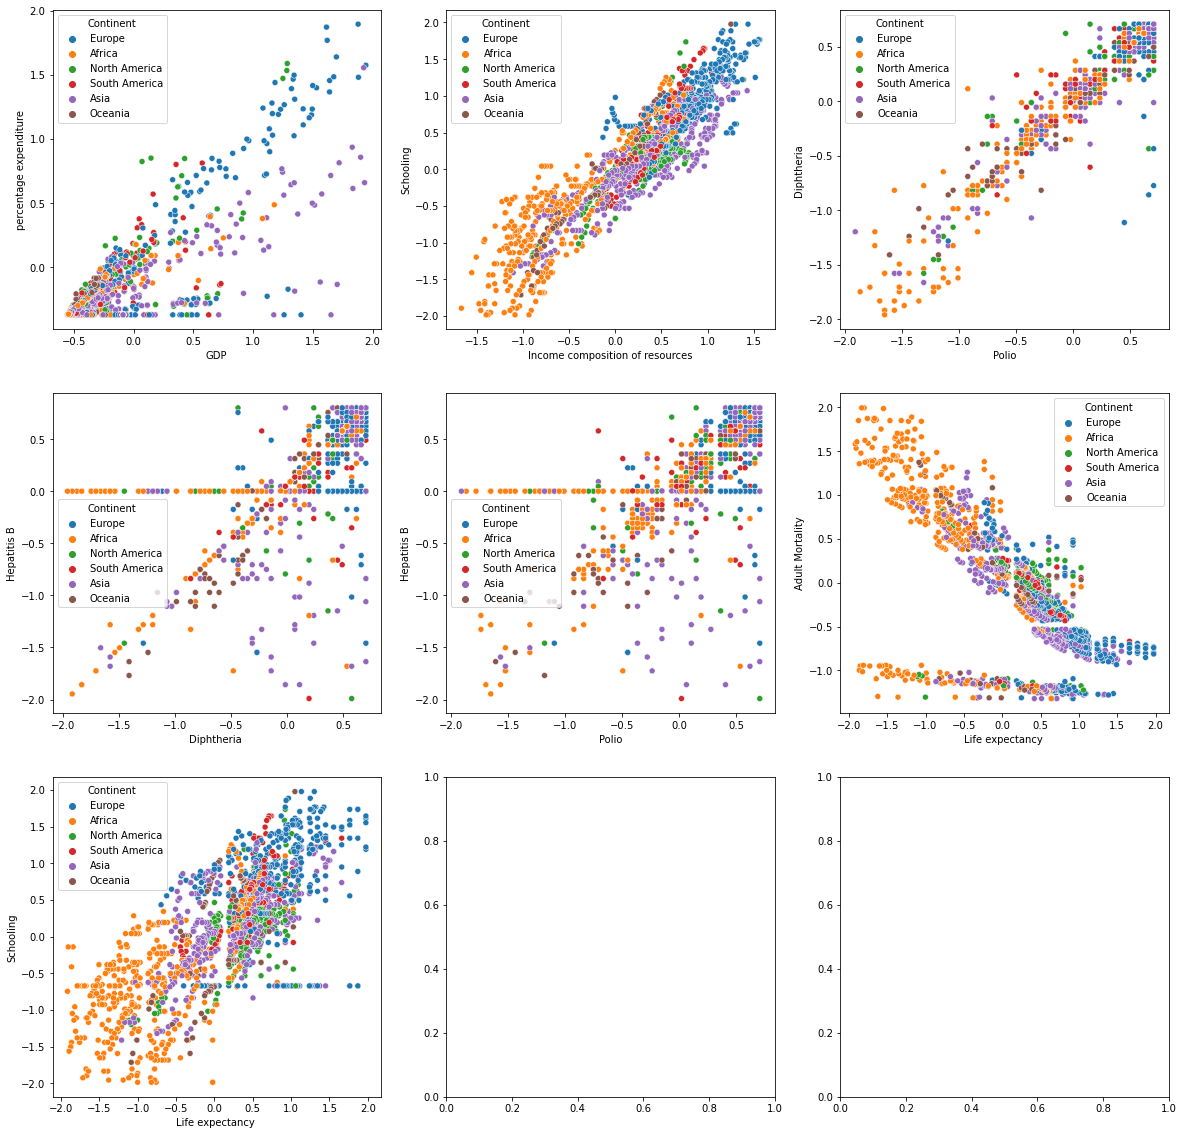

In [53]:
_, axes = plt.subplots(3,3, figsize=(20,20))
for plot in bivariate_plots.items():
    sns.scatterplot(x= plot[1][0], y=plot[1][1], hue = 'Continent', data=df, ax=axes.flatten()[plot[0]]) 

plt.show()

<AxesSubplot:>

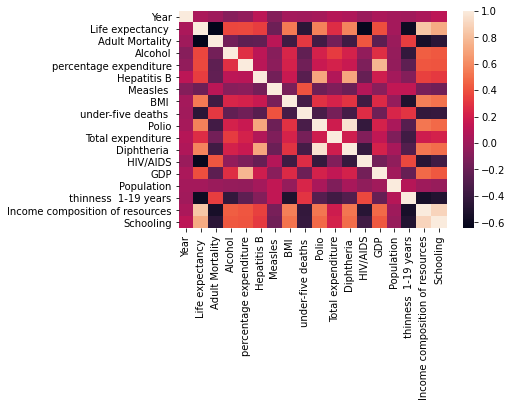

In [54]:
# Changing all negative values to positive inorder to set a limit in heatmap.
corr = df.corr()
# Placing a minimum limit to check for correlated values.
sns.heatmap(corr)

# Part 3.B

- As seen from the Bivariate graphs and Advanced Graphs:
> **GDP vs Percentage Experience**: There is a positive linear relationship between the two variables. Furhtermore, developed countries tend to have high GDP and Percentage Experience.                            
> **Income Composition of Resources vs Schooling**: There is a positive linear relationship between the two variables. Furhtermore, developed countries tend to have high GDP and Percentage Experience.                  
> **Polio vs Diphtheria**:                        
> **Dephtheria vs Hepatitis B**:                                
> **Polio vs Hepatitis B**:                                   
> **Life Expectancy vs Adult Mortality**:                           
> **Life Expectancy vs Schooling**:                         

                

In [55]:
# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = df[numeric_columns].iloc[:,:-1].values
y = df[numeric_columns].iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Scaling the Train - Test splits
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

# print(A_train)

In [57]:
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))


The MSE using OLS is: 0.18113269863117268
The MSE using Ridge is: 0.1812212536472433
The MSE using Lasso is: 0.18163601615384545


In [59]:
# ## Details of the best estimates
print('The best penalty coefficient is:', reg1.alpha_)
print('The best coefficient estimates are:', reg1.coef_)
print(dir(reg1))

AttributeError: 'LinearRegression' object has no attribute 'alpha_'